In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft
from scipy.signal import tf2zpk, freqz, lfilter

## Función de graficación del diagramas de polos y ceros

In [29]:
def PoleZeroPlot(b, a):
    (zeros,poles,gain) = tf2zpk(b, a)
    angle = np.linspace(-np.pi,np.pi,50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    plt.figure()
    plt.plot(poles.real, poles.imag, 'x', zeros.real, zeros.imag, 'o', cirx,ciry, 'k-')
    plt.grid()

    plt.xlim((-2, 2))
    plt.xlabel('Real')
    plt.ylim((-1.5, 1.5))
    plt.ylabel('Imag')
    plt.gcf().set_figwidth(5)
    return (zeros,poles,gain)

## Aplicación en un sistema

(array([], dtype=float64), array([0.25+0.4330127j, 0.25-0.4330127j]), 1.0)

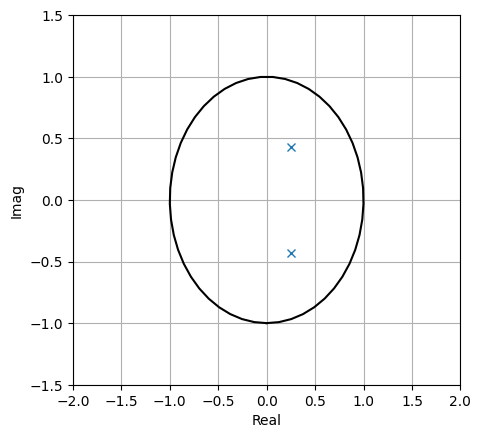

In [30]:
fm=10000
b=[1] #Ceros
a=[1,-0.5,0.25] #Polos

PoleZeroPlot(b,a)

## Respuesta en frecuencia

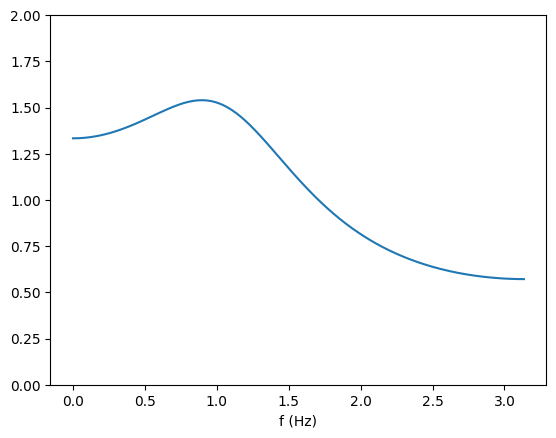

In [31]:
w, h = freqz(b,a, whole=False)
plt.plot(w, abs(h))
plt.xlabel('f (Hz)')
plt.ylim([0, 2])
plt.show()

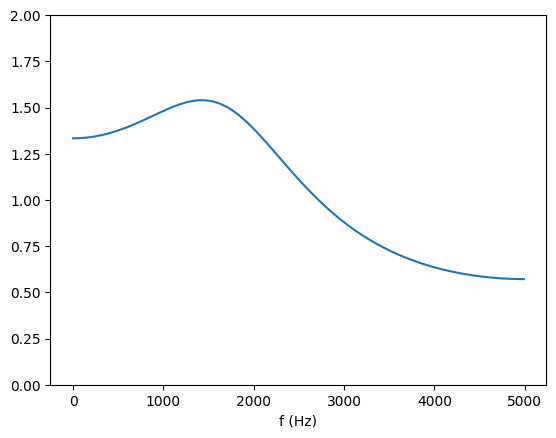

In [32]:
w, h = freqz(b,a,fs=fm)
plt.plot(w, abs(h))
plt.xlabel('f (Hz)')
plt.ylim([0, 2])
plt.show()

# Práctica
Veniamos viendo formas de caracterizar un sistema:
1. $y(n) = f(y,x)$
2. Rta al impulso $h(n)$ (temporal)
3. Rta en frecuencia $H(z)$

Ambas Hs son funciones de trnasferencias, porque son en funcion de la salida y la entrada.

Uso:
- Ciclo for
- Convolución
- Filtrado

Ya haciamos filtrado, ahora vamos a hacer un filtrado temporal usando los coeficientes.

Cual es la relacion entre la transformada de Fourier y la Z. 

$y(t) = f(y, x) \rightarrow H(s) = \frac{Y(s)}{X(s)}$

$y(n)=f(y,x)\rightarrow H(z) = \frac{Y(z)}{X(z)}$




$y(n) = x(n)+\frac{1}{2} y(n-1) - \frac{1}{4}y(n-2)$

Aplicar TZ:
$$y(z)=x(z)+\frac{1}{2}y(z).z^{-1}-\frac{1}{4}y(z).z^{-2}$$
$$y(z)-\frac{1}{2}y(z).z^{-1}+\frac{1}{4}y(z).z^{-2}=x(z)$$
$$y(z).(1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2})=x(z)$$


$$H(z)=\frac{y(z)}{x(z)}=\frac{1}{1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}}$$

En ARMA, autoregresivo corresponde al denominador y la memoria al de arriba. 

Todo sistema ARMA puede aproximarse por uno autoregresivo.

Identificar un sistema seria estimar la funcion de transferencia del sistema MA que aproxima al sistema real.

Pasos:
- Algoritmo de Levinson-Durbin (alg p estimar $a_k$ dado $p$)
- Criterio estimacion orden

## Análisis del sistema:
1. Estabilidad
2. Rta en frecuencia. (Diagrama de Bode)

### Analizar estabilidad
Diagrama de polos y ceros y ver que los polos esten dentro del círculo unitario.

Los ceros son los que hacen nulos el numerador de Hz y los polos los que hacen 0 el denominador.
## EJERCICIO:

Generar una señal de fm=10 KHz, con suma de 2 senoidales de muy baja y muy alta frecuencia, respectivamente, y pruebe el efecto del filtro usando el comando:

y=lfilter(b,a,x)

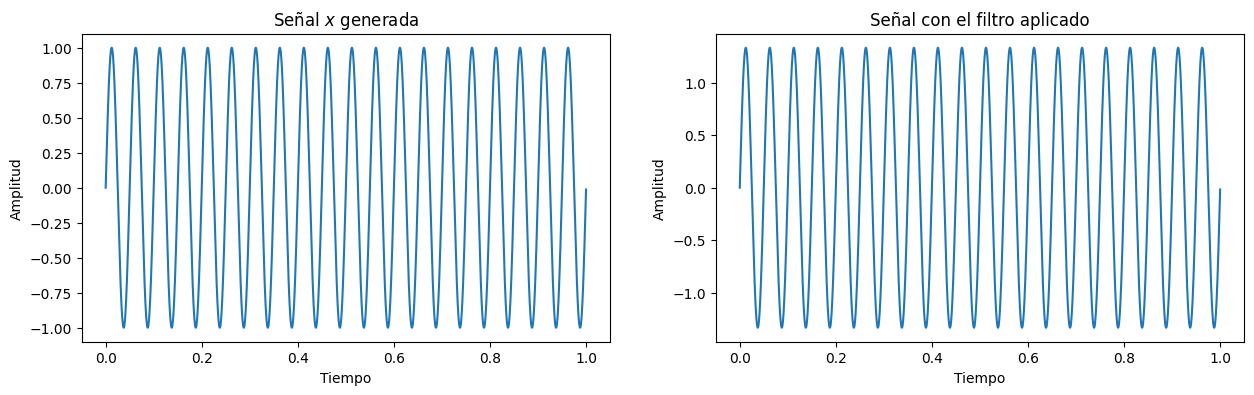

In [49]:
fm = 10000 
t = np.arange(0,1,1/fm)
N = len(t)

fs1 = 20
fs2 = 5000
x = np.sin(2*np.pi*fs1*t) + np.sin(2*np.pi*fs2*t)

y = lfilter(b, a, x)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Señal $x$ generada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.plot(t, x)
plt.subplot(122)
plt.title("Señal con el filtro aplicado")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.plot(t,y)
plt.show()

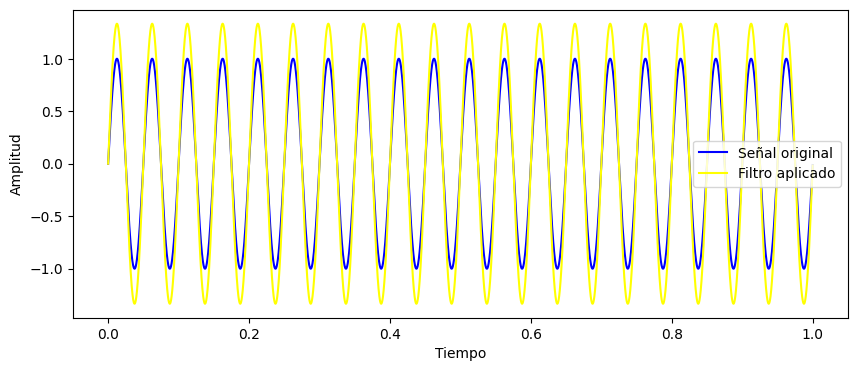

In [51]:
plt.figure(figsize=(10,4))
plt.plot(t, x, color="blue", label="Señal original")
plt.plot(t, y, color="yellow", label="Filtro aplicado")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()